<a href="https://colab.research.google.com/github/bcguilherme/arquivos-legais/blob/main/energy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from ipywidgets import interact, widget
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import scipy

In [ ]:
#usando arima
df=pd.read_excel("/Users/chenyenpin/Downloads/7_37/energy.xlsx", parse_dates=["DATE"], index_col="DATE")
df

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165
...,...
2018-08-01,113.0449
2018-09-01,101.4058
2018-10-01,94.4922


In [ ]:
df.shape

(408, 1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
energy,408.0,88.062232,15.16854,54.6165,76.49975,88.94045,99.7332,126.3626


In [ ]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [ ]:
df.columns=["producao"]
df

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165
...,...
2018-08-01,113.0449
2018-09-01,101.4058
2018-10-01,94.4922


<AxesSubplot:xlabel='DATE'>

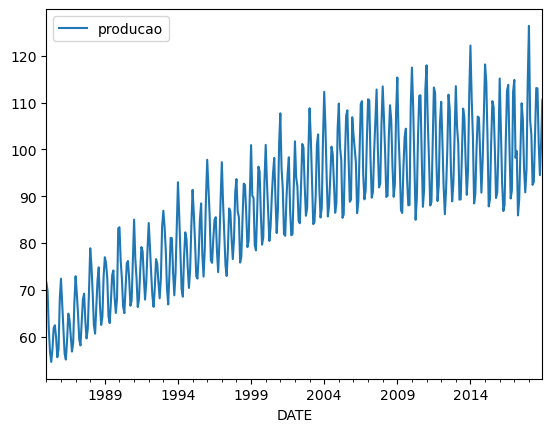

In [ ]:
df.plot()

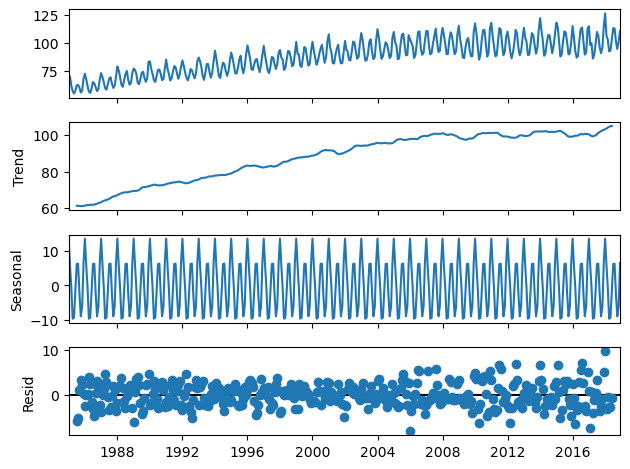

<Figure size 1800x800 with 0 Axes>

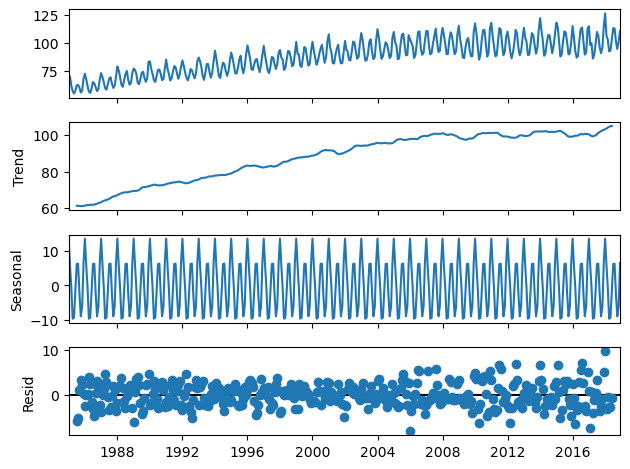

In [ ]:
resultado=seasonal_decompose(df)
plt.figure(figsize=(18,8))
resultado.plot()

<AxesSubplot:xlabel='DATE'>

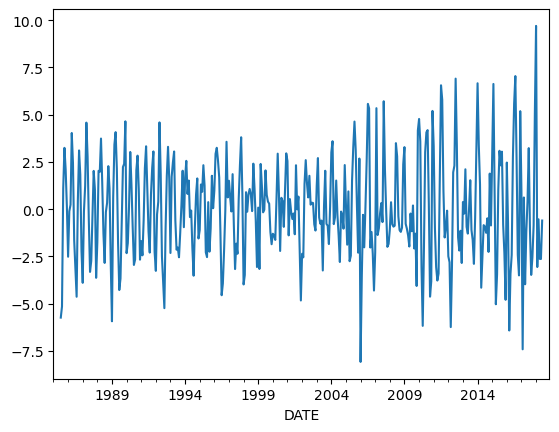

In [ ]:
resultado.resid.plot()

In [ ]:
#testando se o modelo eh estacionaria se eh maior qu 5% ela n eh estacionario
result=adfuller(df["producao"].dropna())
print(f"TESTE ADF:{result[0]}")
print(f"TESTE PVALUE :{result[1]}")
#teste nao eh estationaria( nao estacionaria) logo segue tendencias ou sazonalidades rejeitar a hipotese nula( rejeitar que a hipotese eh estacionaria)
#quando eh estacionario ela nao sofre por tendencia ou sazonallidades valores abaixo de 0.05 ate 0.01

TESTE ADF:-2.252399047046584
TESTE PVALUE :0.18777984601968167


In [ ]:
df.diff().head()

,producao
DATE,
1985-01-01,NaN
1985-02-01,-1.8050
1985-03-01,-8.1080
1985-04-01,-4.9311
1985-05-01,-2.1314


In [ ]:
#eh um modelo estacionario
result=adfuller(df["producao"].diff().dropna())
print(f"TESTE ADF:{result[0]}")
print(f"TESTE PVALUE :{result[1]}")

TESTE ADF:-7.450892277526346
TESTE PVALUE :5.6745699558553634e-11


In [ ]:
step_wise=auto_arima(df, d=1, start_p=1, start_q=1, max_p=3,max_q=3,
                     seasonal=True, m=6, D=1, start_P=1,
                     start_Q=1, max_P=2, max_Q=2, information_criterion="aic",
                     trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.88 sec


 ARIMA(0,1,0)(0,1,1)[6]             : AIC=2142.594, Time=1.43 sec
 ARIMA(0,1,0)(0,1,2)[6]             : AIC=2096.369, Time=3.24 sec
 ARIMA(0,1,0)(1,1,0)[6]             : AIC=2071.021, Time=1.34 sec
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=2056.200, Time=2.58 sec
 ARIMA(0,1,0)(1,1,2)[6]             : AIC=1955.628, Time=6.42 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=2070.215, Time=2.06 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=2014.870, Time=4.59 sec
 ARIMA(0,1,0)(2,1,2)[6]             : AIC=1957.574, Time=6.03 sec
 ARIMA(0,1,1)(0,1,0)[6]             : AIC=2487.185, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=1.55 sec
 ARIMA(0,1,1)(0,1,2)[6]             : AIC=2068.949, Time=2.29 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=2033.068, Time=1.09 sec
 ARIMA(0,1,1)(1,1,1)[6]             : AIC=2005.507, Time=1.81 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=5.90 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=2027.555, Time=1.64 sec
 ARIMA(0,1

In [ ]:
print(step_wise.aic())

1866.3999337852233


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model= SARIMAX( df, order=(1,1,1),seasonal_order=(1,1,2,6))
resultado_sarimax = model.fit()

/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/chenyenpin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68969D+00    |proj g|=  1.36575D-01

At iterate    5    f=  2.32533D+00    |proj g|=  2.86407D-02

At iterate   10    f=  2.28942D+00    |proj g|=  2.27652D-02

At iterate   15    f=  2.28115D+00    |proj g|=  4.27472D-03

At iterate   20    f=  2.27269D+00    |proj g|=  3.76426D-03

At iterate   25    f=  2.27255D+00    |proj g|=  6.96399D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     33      1     0     0   

In [ ]:
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Sun, 11 Jun 2023   AIC                           1866.400
Time:                                        09:30:38   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.L1         -0.9601      0.017    -56.250      0.000      -0.994      -0.927
ar.S.L6       -0.9973      0.003   -350.061      0.000      -1.003      -0.992
ma.S.L6        0.1026      0.037      2.775      0.006       0.030       0.175
ma.S.L12      -0.7748      0.035    -22.181      0.000      -0.843      -0.706
sigma2         5.6413      0.322     17.544      0.000       5.011       6.272
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                29.17
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred=resultado_sarimax.get_prediction(start=-12)
predicao_media=pred.predicted_mean
intervalo_confianca=pred.conf_int()

predicao_media

2018-01-01    119.799960
2018-02-01    111.502505
2018-03-01     99.367893
2018-04-01     90.454697
2018-05-01     92.827045
2018-06-01    103.618505
2018-07-01    112.842579
2018-08-01    109.836400
2018-09-01    101.618277
2018-10-01     92.330549
2018-11-01     96.609476
2018-12-01    114.258958
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
intervalo_confianca=pred.coef_int()
limite_abaixo=intervalo_confianca.iloc[:,0]
limite_acima=intervalo_confianca.iloc[:,1]

AttributeError: 'PredictionResults' object has no attribute 'coef_int'

In [ ]:
intervalo_confianca

,lower producao,upper producao
2018-01-01,115.144744,124.455177
2018-02-01,106.847290,116.157720
2018-03-01,94.712678,104.023108
2018-04-01,85.799482,95.109912
2018-05-01,88.171830,97.482260
2018-06-01,98.963290,108.273719
2018-07-01,108.187366,117.497792
2018-08-01,105.181188,114.491611
2018-09-01,96.963065,106.273489
2018-10-01,87.675337,96.985760


In [ ]:
limite_abaixo[0], limite_acima[0], predicao_media[0]

(115.14474351463882, 124.45517694366843, 119.79996022915363)

In [ ]:
data_previsao=np.asarray(predicao_media.index)
data=np.asarray(df.index)


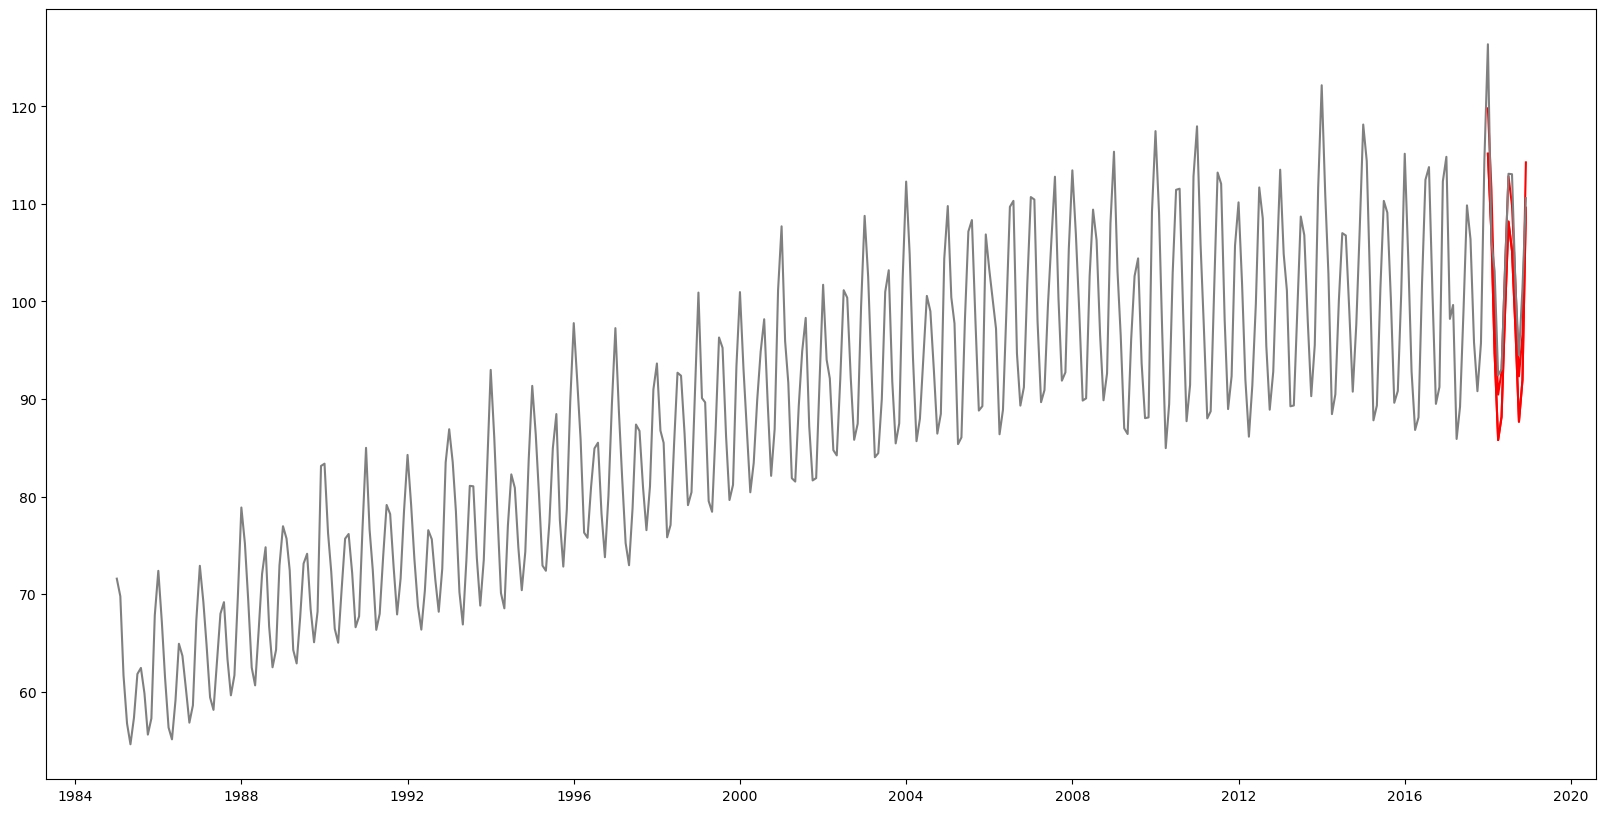

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data_previsao, predicao_media.values, color="red", label="previsao")
plt.plot(data_previsao, limite_abaixo, limite_abaixo, color="red")
plt.plot(data, df.values, color="grey", label="original")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae=mean_absolute_error(df[-12:].values, predicao_media.values)
mae

2.7071203904517582

In [ ]:
forecast= resultado_sarimax.get_forecast(steps=12)
forecast_medio=forecast.predicted_mean
forecast_medio


2019-01-01    120.004375
2019-02-01    107.888361
2019-03-01    101.708275
2019-04-01     90.946474
2019-05-01     93.122836
2019-06-01    103.693736
2019-07-01    113.627918
2019-08-01    111.299630
2019-09-01    101.072421
2019-10-01     93.031839
2019-11-01     97.248721
2019-12-01    111.484391
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
intervalo_confianca_fore=forecast.conf_int()
limite_abaixo_fore=intervalo_confianca_fore.iloc[:,0]
limite_acima_fore=intervalo_confianca_fore.iloc[:,1]
limite_abaixo_fore[0],limite_acima_fore[0],forecast_medio[0]

(115.34916572551732, 124.65958498583437, 120.00437535567585)

In [ ]:
data_fore=np.asarray(forecast_medio.index)
pred_data=np.asarray(predicao_media.index)
pred_data

array(['2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

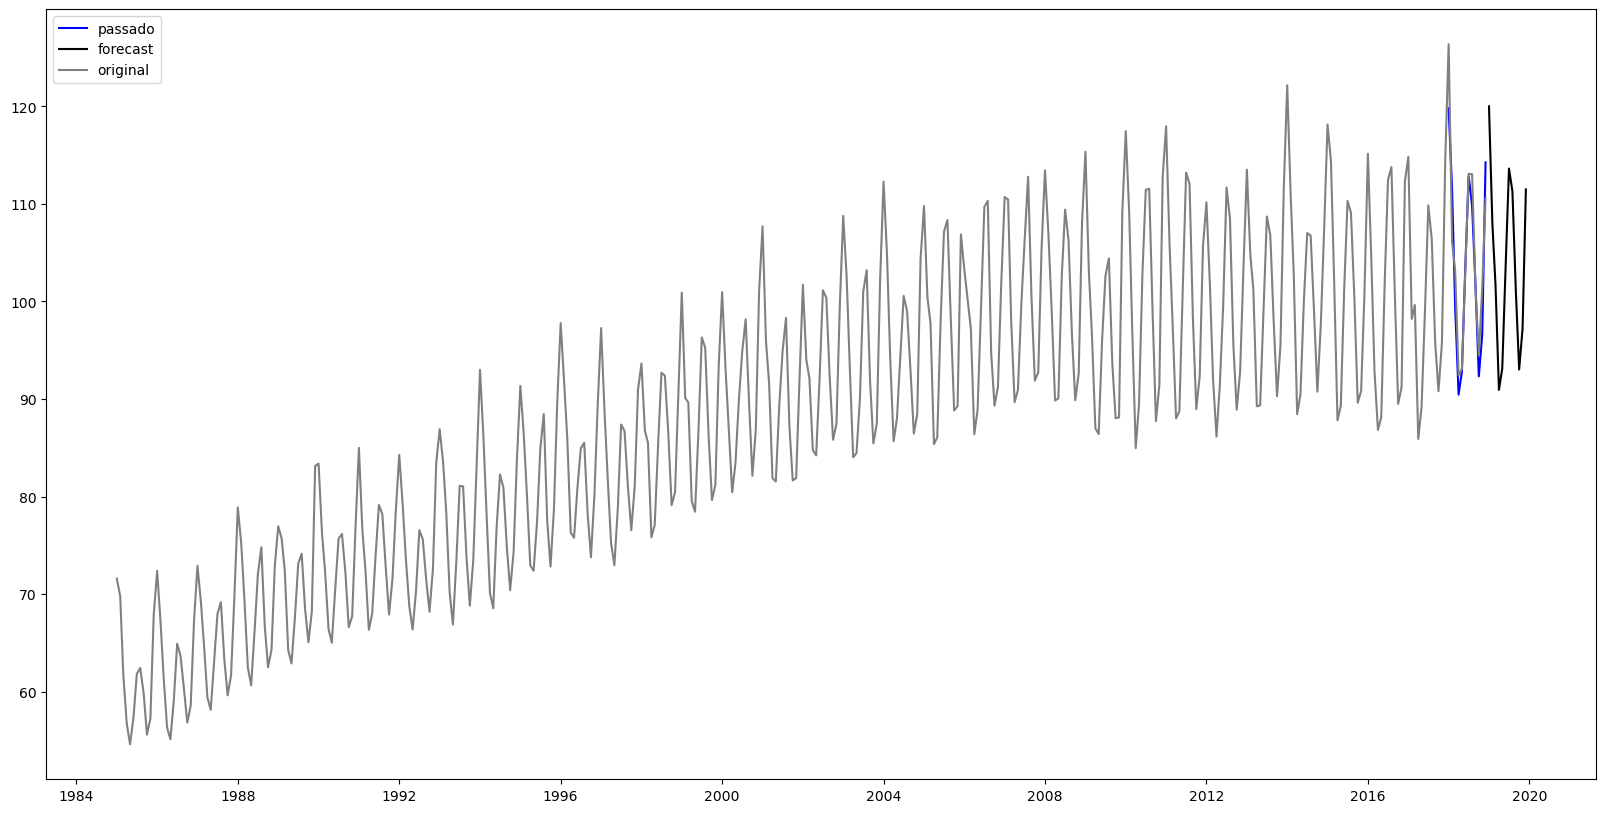

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pred_data, predicao_media.values, color="blue", label="passado")
plt.plot(data_fore, forecast_medio, color="black", label="forecast")
#plt.fill_between(data_fore, limite_acima_fore, limite_abaixo_fore, color="black")
#plt.fill_between(data_previsao, limite_abaixo, limite_abaixo, color="blue")
plt.plot(data, df.values, color="grey", label="original")
plt.legend(loc="upper left")
plt.show()

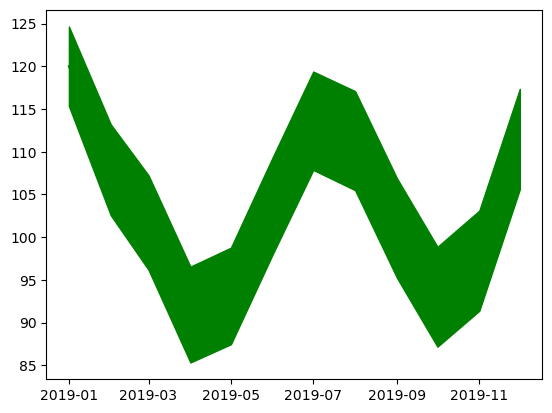

In [ ]:
plt.plot(data_fore, forecast_medio, color="green", label="forecast medio")
plt.fill_between(data_fore, limite_acima_fore, limite_abaixo_fore, color="green", label="limite forecast")
